# CMSE 802 Pre-class assignment: Convection Effect on PDEs
## Date: 09/18/2018
## Due: 09/19/2018; 10:30 PM
### The goal of this assignment is to learn how to include the convection in simulations. We will test backward and forward differencing schemes, and know about upwind and downwind schemes. We will also know about the criterion for numerical stability. 

---
### Your name: Boyao Zhu

---
### In this assignment, we will learn abount some basic ideas about the convection term in differential equations. 

**Convection** is a transport combined diffusion and advection, and **advenction** is the part of transport carried by flow. However, these two terminologies are commonly used interchangeably in the research community.

The three movies below, from left to right, illustrate the cases of diffusion, advection, and convection, respectively.

<img src="Diffusn_1.gif" alt ="drawing" width=300 align="left" hspace="10"/>
<img src="Advctn_1.gif" alt ="drawing" width=300 align="left" hspace="10"/>
<img src="Cnvctn_1.gif" alt ="drawing" width=300, height=200, align="left" hspace="10"/>



---
### Part 1: Watch the youtube video for convection and diffusion.

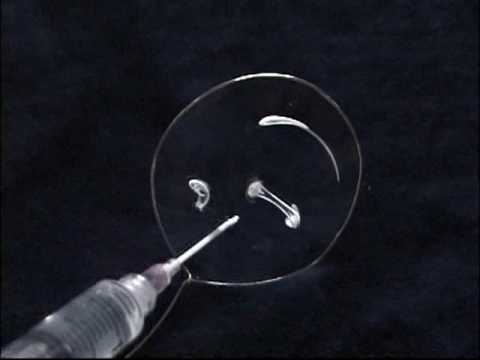

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('iuLAc3G9tvc',width=640,height=480)
## This video describes the convection and diffusion.

### Convection-diffusion equation:

Let's use a 2D case for the development of convection-diffusion equation. For a control volume shown below, 

<img src="ContrVlm-2.jpg" alt="drawing" width=400 />

similar to the derivation of diffusion equation in the previous assignments, the mass conservation is described by 

$$J_{x-} \Delta z \Delta x - J_{x+} \Delta y \Delta z  + J_{y-} \Delta x \Delta z - J_{x+} \Delta x \Delta z =   \Delta x \Delta y \Delta z \dot{C} ~~~~\Longrightarrow~~~~ \frac{J_{x-} - J_{x+}}{\Delta x} + \frac{J_{y-} - J_{y+}}{\Delta y} = \dot{C},$$

where $J_{x-}$ and $J_{x+}$ are the incoming and outgoing fluxes along the $x$-direction, same notation applies to the fluxes along the $y$-direction, and $\dot{C}$ is the concentration change rate.

In the case of convection, the flux contains two parts. The first part is the diffusional flux that results from concentration gradeint. The second part is the advective flux that is carried by a flow. The velocity of the flow at the center point of the control volume is $\vec{v} = (u, v)$, where $u$ and $v$ are the components along the $x$ and $y$ directions, respectively. Thus, we have the fluxes along the $x$ and $y$ directions as 

$$J_x = -D \frac{\partial C}{\partial x} + u C~~~\text{and}~~~ J_y = -D \frac{\partial C}{\partial y} + v C,$$

respectively. Subtituting the fluxes into the mass conservation equation, we obtain 

$$\frac{J_{x-} - J_{x+}}{\Delta x} + \frac{J_{y-} - J_{y+}}{\Delta y} = \dot{C} ~~~~\Longrightarrow~~~~ - \frac{\partial J_x}{\partial x} - \frac{\partial J_y}{\partial y}  = \frac{\partial C}{\partial t} ~~~~\Longrightarrow~~~~ D\frac{\partial^2 C}{\partial x^2} - C \frac{\partial u}{\partial x} - u \frac{\partial C}{\partial x} + D \frac{\partial^2 C}{\partial y^2} - C \frac{\partial v}{\partial y} - v \frac{\partial C}{\partial y} = \frac{\partial C}{\partial t}. $$

For incompressible fluid, due to volume conservation,

$$\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = 0; ~~~~\text{i.e.,}~~~~ \nabla \cdot \mathbf{v}=0. $$

As a result, the 2D convection-diffusion equation becomes

$$ \frac{\partial C}{\partial t} = D \bigg( \frac{\partial^2 C}{\partial x^2} + \frac{\partial^2 C}{\partial y^2} \bigg) - \bigg( u \frac{\partial C}{\partial x} + v \frac{\partial C}{\partial y} \bigg). $$

---
### Part 2: 1D convection-dffusion equation.

In our first programming practice, we will use a 1D case to gain knowledge of solving convection-diffusion eqaution.

**Let's first ignore the diffusion part and focus only on studying the advection part. Assume $D$ is negligibly small, the eqaution becomes**

$$\frac{\partial C}{\partial t} = - u \frac{\partial C}{\partial x}.$$

For the first-order derivative appearing on the right hand side, we have three options: (1) backward, (2) forward, and (3) central differencing schemes. Because the issues involving central differencing scheme for convection are complicated, we will only test backward and forward differencing shcemes in this assignment. 

**(1) Backward difference:** The derivative is taken between point $i$ and the one before it. **Here, we only use backward difference for spatial derivative, not time derivative.**

$$\frac{C_{i}^{(n+1)} - C_{i}^{(n)}}{\Delta t}  = - u \frac{ C_{i}^{(n)} - C_{i-1}^{(n)} }{\Delta x}.$$


### <font color=red> Task 1:</font> We use a 1D domain for the simulation of convection. The domain is discretized with 301 grid points. The advection velocity along the x direction is +1.  

**Watch the video clip attached to this assignment.** 

<video controls src="Bckwrd_Dffnc.mp4" width = 720/>

### Fill the blank and make the code work.

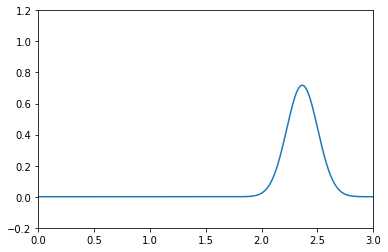

In [18]:
 ############################################################
# Code 1: backward difference for advection
############################################################

import math
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output


# parameters
tm = 0.0
dfs = 1.0e-5
X_0 = 0.8

# spatial discretization
nx = 301

Xg = np.linspace(0,3,nx)
dx = Xg[2]-Xg[1]

dt = 0.4*1e-2

print(dx,dt)

# lists for storing results
Con_o = np.zeros(nx)
Con_n = np.zeros(nx)

Cnvc = np.zeros(nx)

# ##################
# advection velocity
u_x = 1.0
# ##################

# initial concentration profile 
Con_o[0:nx] = np.exp(-(Xg[0:nx]-X_0)**2/(4*500*dfs))


# time iteration
for iter in range(400):
    
    # convection part using backward differencing
    Cnvc[1:nx-1] = (Con_o[1:nx-1]-Con_o[0:nx-2])/dx    # <== fill the blank
    
    # update concentration
    Con_n[1:nx-1] = Con_o[1:nx-1] - u_x*Cnvc[1:nx-1]*dt      # <== fill the blank
    
    # boundary condition
    Con_n[0] = Con_n[1]
    Con_n[nx-1] = Con_n[nx-2]
    
    tm = tm + dt
    
    Con_o[:] = Con_n[:]
    
    
    # visualization
    if iter%10 == 0:        
        clear_output(wait=True) # Clear output for dynamic display
        
        plt.plot(Xg,Con_o,'-')
        plt.axis([0.0, 3.0, -0.2, 1.2])
        plt.show()
     
        time.sleep(0.05)         # Sleep for half a second to slow down the animation
        
  
  

**(2) Forward difference:** The derivative is taken between point $i$ and the one after it.

$$\frac{C_{i}^{(n+1)} - C_{i}^{(n)}}{\Delta t}  = - u \frac{ C_{i+1}^{(n)} - C_{i}^{(n)} }{\Delta x}.$$

### <font color=red>Task 2:</font> Copy your code that works using backward difference to the cell below and change the advection term to the forward differencing scheme. Test the code to see whether the iteration is stable.

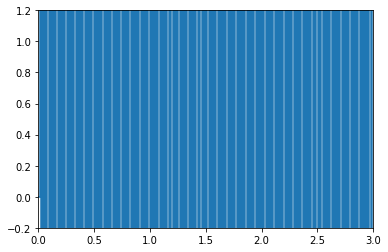

In [21]:
############################################################
# Code 2: forward difference for advection
############################################################

import math
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output


# parameters
tm = 0.0
dfs = 1.0e-5
X_0 = 0.8

# spatial discretization
nx = 301

Xg = np.linspace(0,3,nx)
dx = Xg[2]-Xg[1]

dt = 0.4*1e-2

print(dx,dt)

# lists for storing results
Con_o = np.zeros(nx)
Con_n = np.zeros(nx)

Cnvc = np.zeros(nx)

# ##################
# advection velocity
u_x = 1.0
# ##################

# initial concentration profile 
Con_o[0:nx] = np.exp(-(Xg[0:nx]-X_0)**2/(4*500*dfs))


# time iteration
for iter in range(400):
    
    # convection part using backward differencing
    Cnvc[1:nx-1] = (Con_o[1:nx-1] - Con_o[0:nx-2])/dx   # <== fill the blank
    
    # update concentration
    Con_n[1:nx-1] = Con_o[1:nx-1] + u_x * Cnvc[1:nx-1] * dt     # <== fill the blank
    
    # boundary condition
    Con_n[0] = Con_n[1]
    Con_n[nx-1] = Con_n[nx-2]
    
    tm = tm + dt
    
    Con_o[:] = Con_n[:]
    
    
    # visualization
    if iter%10 == 0:        
        clear_output(wait=True) # Clear output for dynamic display
        
        plt.plot(Xg,Con_o,'-')
        plt.axis([0.0, 3.0, -0.2, 1.2])
        plt.show()
     
        time.sleep(0.05)     
        # Sleep for half a second to slow down the animation
        
  
  

### Question: Which scheme leads to a stable simulation?

**Your answer:** Backward scheme would be stable.  But it is wiered for me.  Because the formula you gave is forward instead of backward when I found some forward and backward schemes in other references.

### <font color=red>Task 3:</font> Let's test another case, in which the velocity is changed to -1. Using the two codes above, change the velocity to -1, test which scheme leads to a stable simulation in this new case. Backward or Forward?

**Your answer:** Forward scheme would be stable

### Question: When u_x = +1, which scheme is stable?  When u_x = -1, which scheme is stable?

**Your answer:** When u_x = +1, backward is stable. and when u_x = -1, forward is stable.

### <font color=red>Task 4:</font> Let's think about the terminology. Upwind scheme means that the derivative is taken on the side where wind (advection) blows from. Downwind scheme means that the derivative is taken on the side following wind flows. So, for u_x = +1, the wind flows from left to right, and for u_x = -1, the wind flows from right to left. 

### Question: In your test simulations, which scheme is stable? Upwind or downwind?

**Your answer:** downwind

### <font color=red>Task 5:</font> Now, let's try another case in which the wind changes direction during simulation. Initially, the wind blows from the left (u_x = +1), after t > 1.2, the wind blows from the right (u_x = -1). Complete the code below and do the simulation.

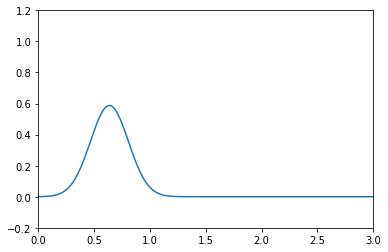

In [23]:
############################################################
# Code 3: wind changes direction
############################################################

import math
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output


# parameters
tm = 0.0
dfs = 1.0e-5
X_0 = 0.8

# spatial discretization
nx = 301

Xg = np.linspace(0,3,nx)
dx = Xg[2]-Xg[1]

dt = 0.4*1e-2

print(dx,dt)

# lists for storing results
Con_o = np.zeros(nx)
Con_n = np.zeros(nx)

Cnvc = np.zeros(nx)


# initial concentration profile 
Con_o[0:nx] = np.exp(-(Xg[0:nx]-X_0)**2/(4*500*dfs))


# time iteration
for iter in range(800):
    
    if tm < 1.5:
        # advection velocity
        u_x = +1.0 
        # convection part 
        Cnvc[1:nx-1] = (Con_o[1:nx-1]-Con_o[0:nx-2])/dx     # <== fill the blank
    else:
        # advection velocity
        u_x = -1            # <== fill the blank
        # convection part 
        Cnvc[1:nx-1] = (Con_o[2:nx]-Con_o[1:nx-1])/dx    # <== fill the blank
    
    # update concentration
    Con_n[1:nx-1] = Con_o[1:nx-1] - Cnvc[1:nx-1]*dt*u_x      # convection part 
    
    # boundary condition
    Con_n[0] = Con_n[1]
    Con_n[nx-1] = Con_n[nx-2]
    
    tm = tm + dt
    
    Con_o[:] = Con_n[:]
    
    
    # visualization
    if iter%10 == 0:        
        clear_output(wait=True) # Clear output for dynamic display
        
        plt.plot(Xg,Con_o,'-')
        plt.axis([0.0, 3.0, -0.2, 1.2])
        plt.show()
     
        time.sleep(0.04)         # Sleep for half a second to slow down the animation
           

### Question: In your result, does the shape of concentration profile change during convection even without any diffusion term involved in the model? What happened? 
**Hint: Go to wikipedia and search for upwind scheme.**

**Your answer:** No, the shape of concentration doesn't change.  The shape is just moving back and forth.

---
### Part 2: Stability criteria in convection

### Task 6: I hope you read the wikipedia page through the Courant–Friedrichs–Lewy (CFL) condition. For numerical stability, the time step size is constrained by CFL condition. Type CFL condition in the cell below.

**Your answer:** CFL = $ \frac{\mid u \mid \Delta t}{\Delta x} \leq 1 $

### Now we want to do a convenction simulation in a higher resolution (decrease dx size) with a stronger wind. Copy your code 1 to the cell below. (1) Change number of grids to 601, (2) change wind speed to +6, (3) find a time step size that satisfies the CFL condition, and (4) run the simulation.

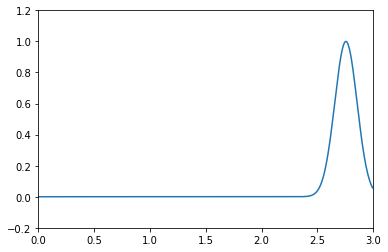

In [29]:
############################################################
# Code 4: High resolution simulation 
############################################################

import math
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output


# parameters
tm = 0.0
dfs = 1.0e-5
X_0 = 0.8

# spatial discretization
nx = 601

Xg = np.linspace(0,3,nx)
dx = Xg[2]-Xg[1]

dt = dx/6

print(dx,dt)

# lists for storing results
Con_o = np.zeros(nx)
Con_n = np.zeros(nx)

Cnvc = np.zeros(nx)

# ##################
# advection velocity
u_x = 6.0
# ##################

# initial concentration profile 
Con_o[0:nx] = np.exp(-(Xg[0:nx]-X_0)**2/(4*500*dfs))


# time iteration
for iter in range(400):
    
    # convection part using backward differencing
    Cnvc[1:nx-1] = (Con_o[1:nx-1]-Con_o[0:nx-2])/dx    # <== fill the blank
    
    # update concentration
    Con_n[1:nx-1] = Con_o[1:nx-1] - u_x*Cnvc[1:nx-1]*dt      # <== fill the blank
    
    # boundary condition
    Con_n[0] = Con_n[1]
    Con_n[nx-1] = Con_n[nx-2]
    
    tm = tm + dt
    
    Con_o[:] = Con_n[:]
    
    
    # visualization
    if iter%10 == 0:        
        clear_output(wait=True) # Clear output for dynamic display
        
        plt.plot(Xg,Con_o,'-')
        plt.axis([0.0, 3.0, -0.2, 1.2])
        plt.show()
     
        time.sleep(0.05)         # Sleep for half a second to slow down the animation
        
  


### Our last task for today's pre-class assginment is to watch a video clip for entertainment. Those simulations are from the work by Ron Fedkiw from Stanford University. Have fun watching it. 

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('nJWz0PaMlkI',width=640,height=480) 

### Assignment wrap-up

**What questions do you have, if any, about any of the topics discussed in this assignment.**

**Put your answer here!**

**Do you have any further questions or comments about this material?**

**Put your answer here!**

### Congratulations, you're done with your first pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course Desire2Learn web page.  Go to Assessments > Assignments, find the link for Pre-class assignment 20180920, and upload it there.

**Please keep a copy the code. We will reuse the code in the class.**

See you in class!